# 2023 BDA 데이터 분석·활용 공모전 정신박현 코드

# 목차
1. [컬럼 정보](#1.-컬럼-정보)
2. [Data 불러오기 및 정리](#2.-Data-불러오기-및-정리)<br/>
3. [기본적인 전처리](#3.-기본적인-전처리)<br/>
   - 주문일<br/>
   - 운송장등록일자 <br/>
   - 배송기간<br/>
4. [세부 컬럼 분석](#4.-세부-컬럼-분석)
   - ['수량'관련 컬럼](#수량-관련-컬럼) <br/>
      실질상품수량 <br/>
      실질판매수량 <br/>
      상품수량 이상치
   - ['상품명'관련 컬럼](#상품명-관련-컬럼) <br/>
      상품대분류<br/>
      브랜드 / 상하위 브랜드<br/>
      용량(중량) <br/>
   - [사은품여부](#사은품-여부)
   - ['자재'관련 컬럼](#자재코드-컬럼이-의미하는-바-알아내기) <br/>
      자재코드 의미 (사은품 관련) <br/>
   - [클레임_상태](#클레임_상태)
   - [거래처](#거래처)
   - [주문일](#주문일)
   - [출고예정일](#출고예정일)
   - [주문/배송상태](#주문배송상태)
5. [파일 내보내기](#파일-내보내기)

---

# 1. 컬럼 정보
* [거래처](#거래처)
 : 외부몰_직거래_거래처 단일값으로 고정(분석할 필요 없음)</br>
* 거래처주문번호 : 앞 8자리는 거래주문일을 나타내고, 뒤에 8자리는 또 다른 특징이 있는 듯(분석 필요)</br>
* [주문일](#주문일) : 상품 주문 일을 나타냄</br>
* [사은품여부](#사은품-여부) : 사은품이 있는 경우 'Y', 없는 경우 'N'</br>
* [출고예정일](#출고예정일) : 거래처에서 상품 출고 예정일을 나타냄</br>
* 주문/배송상태 : '배송완료','주문취소','배송취소','배송 중','주문완료','배송 준비','출고 지시'로 나눠져 있음. 배송완료 9할 이상임.</br>
* [클레임_상태](#클레임_상태) : '-','취소완료','반품처리중','교환완료','교환처리중','반품철회','반품완료','반품신청'로 나눠져 있으며, 소비자의 반품 비율을 확인할 수 있음</br>
* [운송장등록일자](#운송장-등록일자-기준-도착일-지정) : 5, 6월 날짜 중 가장 높은 2개의 달을 주목할 필요가 있음</br>

* ['상품'관련 컬럼](#상품명-관련-컬럼)
    *상품명: 상품의 이름을 나타내는 컬럼임. 단 상품명 뿐만 아니라 개수와 중량 및 유통기한 등 부가적 정보도 나와있음. 상품명 데이터에서 추출해야할 정보가 많음 </br>
    * 상품순번: 상품의 순서를 나타냄. 끝의 자리가 1로 끝나면 십의 자리는 1부터 9까지 있고, 161도 존재함. 기준별로 분류하여 순서를 부여한 거 같은데 의미하는 바는 아직 잘… </br>
    * 상품코드: 상품명별로 코드를 부여함. 상품명을 일일이 다 보고 찾기 어려운 단점을 숫자로 대체하여 수월하게 해주는 컬럼임. 상품명이 같으면 같은 상품코드를 보유함.</br>
    * 상품유형: 상품의 구성유형을 나타내는 컬럼임. 단일상품, 묶음상품, 복합상품 세가지로 나타낼 수 있음. 단일상품은 한가지의 상품을 나타내고, </br>묶음상품은 한가지의 상품 X n개로 표시된 말 그대로 묶음 상품을 나타냄. 복합상품은 두가지 종류의 상품으로 구성되어 있음. 단일상품의 비율이 가장 높고, 그 뒤로 묶음 상품, 복합 상품 순임.</br>
    * 상품타입: 상품의 용도와 목적을 설명해주는 컬럼임. 일반과 선물세트, 공백으로 구성되어 있음. 사은품의 경우 공백으로 처리하고, 상품명이 ‘특별한 선택 1호’의 경우 선물세트로 표기함. 그 외에 상품들은 모두 일반임을 알 수 있음.</br>
* ['수량'관련 컬럼](#수량-관련-컬럼)
    * 상품수량 :  </br>
    * 초기자재수량 : </br>
    * 주문수량 : 소비자가 상품별 주문한 수량, 취소와 반품이 되지 않았을 때 수량, 만약 그럴 경우 0으로 처리 </br>
    * 취소수량 : 상품 취소 수량</br>
    * 반품수량 : 취소수량 보다 낮은 수치를 기록 0이 99.6%, 소비자들은 반품보다 취소를 지향함</br>
* ['자재'관련 컬럼](#자재코드-컬럼이-의미하는-바-알아내기)
    * 자재코드: 상품코드와 마찬가지로 자재명과 자재코드가 짝꿍임. 자재명별로 고유한 자재코드가 부여되어 있고, 자재명이 같으면 같은 자재코드를 가짐. 자재코드 길이로 사은품과 일반 상품이 구분되어 있음</br>
    * 자재명: 브랜드와 간략한 상품명과 중량, 마감구분에 대한 정보를 담고 있는 컬럼임. 상품명의 대분류라고 생각할 수 있음.</br>

* 매출액: 상품의 주문수량별로 소비한 비용을 나타내는 컬럼임. 같은 상품을 같은 수량으로 구매하였어도 포인트혜택이나 이벤트 등으로 드는 비용, 매출액이 다를 수 있음. </br>
* 배송유형 : 택배배송, 3PL로 나누어짐.</br>
* 마감구분 : 상온, 풀필먼트(상온),냉동,냉장,풀필먼트(저온) 으로 나눌 수 있음. 풀필먼트</br>
* 플랜트정보 : 동탄센터 > 동탄일반,풀필먼트센터 > 풀필상온센터,풀필먼트센터 > 풀필저온센터,부산센터 > 부산온라인센터,논산센터 > 온라인 택배 창고,진천센터 > 진천센터. 플랜트별로 배송기간의 차이에 주목할 필요가 있을 거라 추측됨</br>
* 단독배송여부 : 단일값으로 처리, 'F' </br>
* GS홈쇼핑주문번호 : 전부 결측값, 추가적인 정보를 알아낼 필요성 있음</br>

---

# 2. Data 불러오기 및 정리

In [112]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

import re

In [113]:
df_n[df_n['사은품여부'] =='Y']['상품명대분류'].value_counts().sum()

2503

In [114]:
# df_1111 = pd.read_excel('track1_11번가.xlsx',sheet_name = None)
# df_nnnn = pd.read_excel('track1_네이버.xls',sheet_name = None)

# sheets_11 = list(df_1111.keys())
# df_11 = pd.DataFrame([])

# for i in sheets_11:
#     df1 = pd.read_excel('track1_11번가.xlsx',sheet_name = i)
#     df1['날짜'] = i
#     df_11 = pd.concat([df_11, df1])

# sheets_n = list(df_nnnn.keys())
# df_n = pd.DataFrame([])

# for i in sheets_n:
#     df2 = pd.read_excel('track1_네이버.xls',sheet_name = i)
#     df2['날짜'] = i
#     df_n = pd.concat([df_n, df2])
    
    
# df_n.to_pickle('df_n.pkl')
# df_11.to_pickle('df_11.pkl')



In [115]:
df_n = pd.read_pickle('df_n.pkl')
df_11= pd.read_pickle('df_11.pkl')

# 3. 기본적인 전처리

네이버

In [116]:
# "주문일 컬럼" 정리 - 날짜형식으로 전환 및 추가 컬럼 생성
df_n['주문일'] = pd.to_datetime(df_n['주문일'], format = '%Y%m%d')
if not any(col in df_n.columns for col in ['구매연도', '구매월', '구매일', '구매요일']):
    df_n.insert(3, '구매연도', df_n['주문일'].dt.year)
    df_n.insert(4, '구매월', df_n['주문일'].dt.month)
    df_n.insert(5, '구매일', df_n['주문일'].dt.day)
    df_n.insert(6, '구매요일', df_n['주문일'].dt.day_name('ko_KR'))

# 주문 요일에 따라 평일/주말 구분 컬럼 생성
df_n['요일'] = df_n['주문일'].dt.weekday
if '평일/주말' not in df_n.columns:
    df_n.insert(7,'평일/주말',df_n['요일'].apply(lambda x: '주말' if x >= 5 else '평일') )

# 운송장 등록일자 기준 도착일 지정
# 운송장 등록 기준 보통 반나절내에 택배사 도착 (12시 이후는 다음날로 설정함)
df_n['운송장등록일자'] = pd.to_datetime(df_n['운송장등록일자'])
df_n['운송장등록일자_시간'] = df_n['운송장등록일자'].dt.time
if '운송장등록_도착날짜' not in df_n.columns:
    df_n.insert(10,'운송장등록_도착날짜',df_n['운송장등록일자'].dt.floor('D'))
df_n.loc[df_n['운송장등록일자_시간'] >= pd.to_datetime('12:00:00').time(), '운송장등록_도착날짜'] = df_n.loc[df_n['운송장등록일자_시간'] >= pd.to_datetime('12:00:00').time(), '운송장등록_도착날짜'] + pd.DateOffset(days=1)

# 배송기간 설정
if '배송기간' not in df_n.columns:
    df_n.insert(12,'배송기간',df_n['운송장등록_도착날짜'] - df_n['주문일'])

# 컬럼 정리할 때 사용한 임의의 보조 컬럼 삭제
df_n.drop(columns = ['날짜','요일','운송장등록일자_시간','등록일자'],inplace=True, errors="ignore")

# 컬럼명 정리
df_n.rename(columns = {'클레임 상태':'클레임_상태'},inplace =True)

# 컬럼 재정렬
df_n = df_n[[ '거래처','거래처주문번호', 
            '주문일', '구매연도', '구매월', '구매일', '구매요일', '평일/주말',
            '상품순번', '상품코드', '상품명', '상품수량', '상품유형', '상품타입','자재코드', '자재명', '초기자재수량', '사은품여부',
            '주문/배송상태', '클레임_상태','출고예정일', '운송장등록_도착날짜', '배송기간', '운송장등록일자',
            '주문수량', '취소수량', '반품수량', '배송유형', '매출액', '마감구분', '플랜트 정보']]

11번가

In [117]:
# "주문일 컬럼" 정리 - 날짜형식으로 전환 및 추가 컬럼 생성
df_11['주문일'] = pd.to_datetime(df_11['주문일'], format = '%Y%m%d')
if not any(col in df_11.columns for col in ['구매연도', '구매월', '구매일', '구매요일']):
    df_11.insert(3, '구매연도', df_11['주문일'].dt.year)
    df_11.insert(4, '구매월', df_11['주문일'].dt.month)
    df_11.insert(5, '구매일', df_11['주문일'].dt.day)
    df_11.insert(6, '구매요일', df_11['주문일'].dt.day_name('ko_KR'))

# 주문 요일에 따라 평일/주말 구분 컬럼 생성
df_11['요일'] = df_11['주문일'].dt.weekday
if '평일/주말' not in df_11.columns:
    df_11.insert(7,'평일/주말',df_11['요일'].apply(lambda x: '주말' if x >= 5 else '평일') )

# 운송장 등록일자 기준으로 도착일 지정, 은송장 등록 기준 보통 반나절이라는 기간이 소요됨. 
# 운송장 등록 기준 반나절내에 택배사 도착 (12시 이후는 다음날로 설정함)
df_11['운송장등록일자'] = pd.to_datetime(df_11['운송장등록일자'])
df_11['운송장등록일자_시간'] = df_11['운송장등록일자'].dt.time
if '운송장등록_도착날짜' not in df_11.columns:
    df_11.insert(10,'운송장등록_도착날짜',df_11['운송장등록일자'].dt.floor('D'))
df_11.loc[df_11['운송장등록일자_시간'] >= pd.to_datetime('12:00:00').time(), '운송장등록_도착날짜'] = df_11.loc[df_11['운송장등록일자_시간'] >= pd.to_datetime('12:00:00').time(), '운송장등록_도착날짜'] + pd.DateOffset(days=1)

# 배송기간 설정
if '배송기간' not in df_11.columns:
    df_11.insert(12,'배송기간',df_11['운송장등록_도착날짜'] - df_11['주문일'])

# 컬럼 정리할 때 사용한 임의의 보조 컬럼 삭제
df_11.drop(columns = ['날짜','요일','운송장등록일자_시간','등록일자'],inplace=True, errors="ignore")

# 컬럼명 정리
df_11.rename(columns = {'클레임 상태':'클레임_상태'},inplace =True)

# 컬럼 재정렬
df_11 = df_11[[ '거래처','거래처주문번호', 
            '주문일', '구매연도', '구매월', '구매일', '구매요일', '평일/주말',
            '상품순번', '상품코드', '상품명', '상품수량', '상품유형', '상품타입','자재코드', '자재명', '초기자재수량', '사은품여부',
            '주문/배송상태', '클레임_상태','출고예정일', '운송장등록_도착날짜', '배송기간', '운송장등록일자',
            '주문수량', '취소수량', '반품수량', '배송유형', '매출액', '마감구분', '플랜트 정보']]

# 4. 세부 컬럼 분석

> ## 수량 관련 컬럼

네이버

* "실질상품수량" 컬럼 정의

In [118]:
# 자재명 기준 실제 상품의 '실질상품수량' 정의

# 1)
df_n['자재명'] = df_n['자재명'].astype(str)

# 2) 정규 표현식 패턴을 사용하여 *뒤의 숫자와 EA앞의 숫자를 추출
pattern1 = r'(?<=G\*)\d+'
pattern2 = r'(?<=\b)\d+(?=EA\b)'

def extract_numbers(text):
    if '*' in text:
        match = re.search(pattern1, text)
        if match:
            return match.group()
    elif 'EA' in text:
        match = re.search(pattern2, text)
        if match:
            return match.group()
    return None

# 자재명 기준 실제 상품의 '실질상품수량' 정의
df_n['실질상품수량'] = df_n['자재명'].apply(extract_numbers)
df_n['실질상품수량'].fillna(1, inplace=True)
df_n['실질상품수량'] = df_n['실질상품수량'].astype(int)

* "실질판매수량" 컬럼 정의

In [119]:
# 실제로 판매된 수량 컬럼 '실질판매수량' 정의
if '실질판매수량' not in df_n.columns:
    df_n.insert(df_n.columns.get_loc('상품명')+1,'실질판매수량',df_n['실질상품수량'] * df_n['주문수량']) 
# df_n.query('실질상품수량 != 0')[['실질상품수량','주문수량','실질판매수량']]

*  '상품수량 이상치 확인'

In [120]:
# 상품수량이 0인 경우 이상치인지 확인
df_n[(df_n['상품수량'] == 0) & (df_n[['초기자재수량', '주문수량']] == 0).any(axis=1)][['초기자재수량', '주문수량', '취소수량', '반품수량']]

,초기자재수량,주문수량,취소수량,반품수량
5582,36,0,36,0
6587,3,0,3,0
6588,2,0,2,0
9307,1,0,1,0
12147,1,0,0,1
12148,1,0,0,1
3194,1,0,0,1
15344,1,0,0,1
2547,48,0,48,0
4690,3,0,3,0


=> 상품수량이 0인 경우 초기자재수량이 0인 경우는 없음. <br>
따라서 상품수량이 0이면 이상치로 간주하고, 1로 대체함

In [121]:
df_n['상품수량'].replace({0:1}, inplace =True)

11번가

In [122]:
# 자재명 기준 실제 상품의 '실질상품수량' 정의

# 1)
df_11['자재명'] = df_11['자재명'].astype(str)

# 2) 정규 표현식 패턴을 사용하여 *뒤의 숫자와 EA앞의 숫자를 추출
pattern1 = r'(?<=G\*)\d+'
pattern2 = r'(?<=\b)\d+(?=EA\b)'

def extract_numbers(text):
    if '*' in text:
        match = re.search(pattern1, text)
        if match:
            return match.group()
    elif 'EA' in text:
        match = re.search(pattern2, text)
        if match:
            return match.group()
    return None

# 자재명 기준 실제 상품의 '실질상품수량' 정의
df_11['실질상품수량'] = df_11['자재명'].apply(extract_numbers)
df_11['실질상품수량'].fillna(1, inplace=True)
df_11['실질상품수량'] = df_11['실질상품수량'].astype(int)

In [123]:
# 실제로 판매된 수량 컬럼 '실질판매수량' 정의
if '실질판매수량' not in df_11.columns:
    df_11.insert(df_11.columns.get_loc('상품명')+1,'실질판매수량',df_11['실질상품수량'] * df_11['주문수량']) 
# df_11.query('실질상품수량 != 0')[['실질상품수량','주문수량','실질판매수량']]

*  '상품수량 이상치 확인'

In [124]:
# 상품수량이 0인 경우 이상치인지 확인
df_11[(df_11['상품수량'] == 0) & (df_11[['초기자재수량', '주문수량']] == 0).any(axis=1)][['초기자재수량', '주문수량', '취소수량', '반품수량']]

,초기자재수량,주문수량,취소수량,반품수량
5102,2,0,0,2
12665,1,0,1,0
31700,1,0,1,0
31701,1,0,1,0
31702,1,0,1,0
39062,5,0,0,5
42185,1,0,1,0


=> 상품수량이 0인 경우 초기자재수량이 0인 경우는 없음. <br>
따라서 상품수량이 0이면 이상치로 간주하고, 1로 대체함

In [125]:
df_11['상품수량'].replace({0:1}, inplace =True)

> ## 상품명 관련 컬럼
>상품명에서 추출하여 새롭게 정의할 수 있는 컬럼: 브랜드, 상품대분류, 용량(중량)

네이버

*  "상품대분류" 컬럼 정의

In [126]:
product_pattern = r'(주먹밥|양념|밀|쌈무|밀면|기름|력|가루|오이|스파게티|고급면|수제군교자|쉐이크|쫄면|마늘|한우|요리유|짜장|치킨가라아게|감자전|쌀국수|순살치킨|부침가루|새우까스|소스|소고기|특별한선택 1호|박력1등|설탕|두부|비지|콩기름|콩|햇반흑미밥|햇반큰공기|햇반작은공기|햇반|햇반/쿡반|햇반/컵반|헷반/솥반|햇반 현미쌀밥|햇반 유기농쌀밥|햇반 발아현미밥|햇반 매일콩잡곡밥|포도씨유|고추장|쿡킷|카놀라유|튀김가루|쿠키|냉면|솔트|소금|믹스|식초|떡국|떡볶이|김치|막국수|쫄볶이|쫄면사리|간짜장|초밥|다시다|칼국수|소바|된장|해바라기유|김가루|밀가루|올리고당|요리당|파우더|옥수수유|군밤|우동|전골|올리브유|소시지|만두|드레싱|김자반|간장김|파래김|돌김|구이김|재래김|미역|구운김|김밥김|군만두|돈까스|신백설너비아니|스팸|어묵|육수|마라탕면|비빔장|쌈장|쁘띠첼|사골곰탕|왕교자|팥죽|황태국|추어탕|육개장|찌개|볶음밥|설렁탕|죽|미역국|잡채|구이|오징어채볶음|불고기|배추|순댓국|장터국|장조림|소고기무국|삼계탕|사골곰탕|비빔밥|무말랭이|해물완자|동그랑땡|도가니|닭곰탕|장조림|묵은지|장조림|꼬리곰탕|깍두기|곤드레나물밥|멸치볶음|감자탕|갈비탕|야채고기말이|스파게티면|베이컨|소면|맛술|청|당면|밥이랑|바삭한요리유|물엿|청양초|차돌된장|바지락꽃게|천일염|맥스봉|맛밤|백숙|스테이크|햄|등심|후랑크|비엔나|샌드위치햄|닭가슴살|핫도그|미트볼|고메치킨|페스츄리|크림치즈파이|너겟|짬뽕|피자|스콘|크로와상|치즈볼|애플파이|깐풍기|탕수육|강력1등|감자수제비가루|메밀생면|젓|소불고기|고구마|너비아니|떡갈비|김말이|핫봉|돈카츠|함박|딤섬|시럽|중력1등|소프트|)'
def extract_product(text):
    pick = re.findall(product_pattern, text)
    if pick:
        for item in reversed(pick):
            if item != '':
                return item
    return ''

df_n['상품명대분류'] = df_n['자재명'].apply(extract_product)

*  "브랜드" 컬럼 정의

In [127]:
#브랜드명 추출
pattern = r'(비비고|햇반|고메|백설|다시다|다담|스팸|맛밤|맛군밤|맥스봉|더건강한|즐거운동행|쁘띠첼|산들애|설탕|밥이랑|크레잇|밸런스밀|쿡킷|올리고당|요리당|물엿|식초|참좋은 조미김가루|천일염|파스타소스|가루|시럽|하선정|소금|알찬소시지|아메리칸스타일포크|빅소시지|행복한콩|고급면용|쉐프솔루션|푸드웨어|파우더|남원|물로만끓여도|유|기름|믹스|중력|박력|강력|분|고추장|된장|쌈장|비빔장|톡톡까먹어밤|한식예찬|아이미|쉐프솔루션|동그랑땡|CJ|특별한선택|함흥비빔냉면소스|프레시안구이|고기팡팡미트볼|고단백 두부면|미정당|오리지널후랑크|햄스빌|한입쏙 비엔나|프레시안|아티장|가쓰오|4무|주부초밥왕|제일제면소|삼호|얼큰우동|오리지널부어스트|청양초 매운물냉면|씨제이)'

def extract_brand(text):
    match = re.search(pattern, text)
    if match:
        return match.group()
    else:
        return None

df_n['브랜드'] = df_n['자재명'].apply(extract_brand)

In [128]:
# 자재명에 브랜드명이 포함되지 않은 상품들 브랜드로 변경
brand_mapping = {'남원' : '씨제이', '맛군밤' : '맛밤', '밥이랑' : '백설', '물로만 끓여도' : '해찬들', '유' : '백설', '기름' : '백설', '설탕' : '백설', '고추장' : '해찬들', '된장' : '해찬들', '쌈장' : '해찬들', '비빔장' : '해찬들', '함흥비빔냉면소스' : '씨제이', '고단백 두부면' : '즐거운 동행', '밸런스밀' : '씨제이', '요리당' : '백설', '올리고당' : '백설', '가루' : '백설', '참좋은 조미김가루' : '씨제이', '믹스' : '백설', '중력' : '백설', '박력' : '백설' ,'강력' : '백설', '분' : '백설', '소금': '백설', '식초' : '백설',
'물엿' : '백설',
'천일염' : '백설',
'시럽' : '메티에',
'파스타소스' : '백설',
'고급면용' : '백설',
'톡톡까먹어밤' : '씨제이',
'한식예찬' : '백설',
'아이미' : '백설',
'쉐프솔루션' : '씨제이',
'동그랑땡' : '백설',
'특별한선택' : '씨제이',
'CJ' : '씨제이',
'프레시안구이' : '백설',
'고기팡팡미트볼' : '씨제이',
'미정당' : '즐거운동행',
'오리지널후랑크' : '백설',
'햄스빌' : '백설',
'한입쏙 비엔나' : '백설',
'프레시안' : '씨제이',
'아티장' : '백설',
'가쓰오' : '씨제이',
'4무' : '하선정',
'주부초밥왕' : '씨제이',
'제일제면소' : '백설',
'얼큰우동' : '씨제이',
'오리지널부어스트' : '더건강한',
'청양초 매운물냉면' : '씨제이',
'물로만끓여도' : '해찬들',
'파우더' : '메티에',
'알찬소시지':'백설',
'빅소시지' : '맥스봉',
'아메리칸스타일포크':'씨제이',
'푸드웨어' : '씨제이'}

df_n['브랜드'] = df_n['브랜드'].map(brand_mapping).fillna(df_n['브랜드'])
df_n['브랜드'] = df_n['브랜드'].fillna('사은품')
df_n['브랜드'].unique()

array(['햇반', '비비고', '씨제이', '백설', '스팸', '즐거운동행', '쿡킷', '고메', '크레잇', '더건강한',
       '다담', '맥스봉', '행복한콩', '쁘띠첼', '삼호', '해찬들', '사은품', '다시다', '맛밤', '산들애',
       '메티에', '하선정', '즐거운 동행'], dtype=object)

* 상/하위 10개 브랜드

In [129]:
nav_top10 = df_n['브랜드'].value_counts().head(10).index
nav_bottom10 = df_n['브랜드'].value_counts().tail(10).index
print( nav_top10 )
print( nav_bottom10 )

Index(['햇반', '비비고', '백설', '씨제이', '고메', '스팸', '해찬들', '더건강한', '다담', '쁘띠첼'], dtype='object')
Index(['맥스봉', '맛밤', '쿡킷', '즐거운동행', '메티에', '하선정', '행복한콩', '산들애', '삼호',
       '즐거운 동행'],
      dtype='object')


* 용량(중량)

In [130]:
#자재 실제수량 뽑아내기
npt = r'\*(\d+)'
df_n['용량'] = df_n['자재명'].str.extract(npt)

In [131]:
#용량 추출하기
pattern1 = r'(?<![A-Za-z])\d+(?:\.\d+)?(?=[GgMLmlKGkg])'
pattern2 = r'(?<=\b)\d+(?=[Ee][Aa]\b)'
pattern3 = r'(?<![A-Za-z])\d+(?:\.\d+)?(?=[Mm][Ll]\b)'

def extract_numbers(text):
    if re.search(pattern1, text):
        matches = re.findall(pattern1, text)
        if len(matches) > 1:
            return '+'.join(matches)
        else:
            return matches[0]
    elif re.search(pattern2, text):
        match = re.search(pattern2, text)
        return match.group()
    elif re.search(pattern3, text):
        match = re.search(pattern3, text)
        return match.group()
    return ''

def combine_numbers(row):
    if '+' in row['용량']:
        numbers = row['용량'].split('+')
        total = sum([float(num) for num in numbers])
        return str(total)
    return row['용량']

def adjust_format(row):
    if re.search(r'(?i)KG', row['자재명']):
        return str(float(row['용량']) * 1000)
    elif re.search(r'(?i)ML', row['자재명']):
        return row['용량']
    elif re.search(r'(?i)L', row['자재명']):
        return str(float(row['용량']) * 1000)
    elif re.search(r'(?i)G', row['자재명']):
        return row['용량']
    return row['용량']

df_n['용량'] = df_n['자재명'].apply(extract_numbers)
df_n['용량'] = df_n.apply(combine_numbers, axis=1)
df_n['용량'] = df_n.apply(adjust_format, axis=1)

11번가

*  "상품대분류" 컬럼 정의

In [132]:
#11번가에서는 햇반 상품들 뒤에 주먹밥이나 김치와 같은 다른 상품들의 이름이 기입이 되어 있는 상품이 많기 때문에 그걸 해결하고자 나머지 함술ㄹ 조금 변형함
product_pattern = r'(주먹밥|양념|밀|쌈무|밀면|기름|력|가루|오이|스파게티|고급면|교자|쉐이크|쫄면|마늘|한우|요리유|짜장|치킨가라아게|감자전|쌀국수|치킨|부침가루|새우까스|소스|소고기|특별한선택 1호|설탕|두부|비지|콩기름|콩|포도씨유|고추장|쿡킷|카놀라유|튀김가루|쿠키|냉면|솔트|소금|믹스|식초|떡국|떡볶이|김치|막국수|쫄볶이|쫄면사리|간짜장|초밥|다시다|칼국수|소바|된장|해바라기유|김가루|밀가루|올리고당|요리당|파우더|옥수수유|군밤|우동|전골|올리브유|소시지|만두|드레싱|김자반|간장김|파래김|돌김|구이김|재래김|미역|구운김|김밥김|돈까스|신백설|너비아니|스팸|어묵|육수|마라탕면|비빔장|쌈장|쁘띠첼|사골곰탕|황태국|추어탕|육개장|찌개|볶음밥|설렁탕|죽|미역국|잡채|구이|오징어채볶음|불고기|배추|순댓국|장터국|장조림|소고기무국|삼계탕|사골곰탕|비빔밥|무말랭이|해물완자|동그랑땡|도가니|닭곰탕|장조림|묵은지|장조림|꼬리곰탕|깍두기|곤드레나물밥|멸치볶음|감자탕|갈비탕|야채고기말이|스파게티면|베이컨|소면|맛술|청|당면|밥이랑|바삭한요리유|물엿|청양초|차돌된장|바지락꽃게|천일염|맥스봉|맛밤|백숙|스테이크|햄|등심|후랑크|비엔나|샌드위치햄|닭가슴살|핫도그|미트볼|페스츄리|크림치즈파이|너겟|짬뽕|피자|스콘|크로와상|치즈볼|애플파이|깐풍기|탕수육|감자수제비가루|메밀생면|젓|소불고기|고구마|떡갈비|김말이|핫봉|돈카츠|함박|딤섬|시럽|소프트)'
def extract_product(text):
    if '햇반' in text:
        return '햇반'
    else:
        pick = re.findall(product_pattern, text)
        if pick:
            for item in reversed(pick):
                if item != '':
                    return item
    return ''


df_11['상품명대분류'] = df_11['자재명'].apply(extract_product)



*  "브랜드" 컬럼 정의

In [133]:
#브랜드명 추출
pattern = r'(비비고|햇반|고메|백설|다시다|다담|스팸|맛밤|맛군밤|맥스봉|더건강한|즐거운동행|쁘띠첼|산들애|설탕|밥이랑|크레잇|밸런스밀|쿡킷|올리고당|요리당|물엿|식초|참좋은 조미김가루|천일염|파스타소스|가루|시럽|하선정|소금|알찬소시지|아메리칸스타일포크|빅소시지|행복한콩|고급면용|쉐프솔루션|푸드웨어|파우더|남원|물로만끓여도|유|기름|믹스|중력|박력|강력|분|고추장|된장|쌈장|비빔장|톡톡까먹어밤|한식예찬|아이미|쉐프솔루션|동그랑땡|CJ|특별한선택|함흥비빔냉면소스|프레시안구이|고기팡팡미트볼|고단백 두부면|미정당|오리지널후랑크|햄스빌|한입쏙 비엔나|프레시안|아티장|가쓰오|4무|주부초밥왕|제일제면소|삼호|얼큰우동|오리지널부어스트|청양초 매운물냉면|씨제이)'

def extract_brand(text):
    match = re.search(pattern, text)
    if match:
        return match.group()
    else:
        return None

df_11['브랜드'] = df_11['자재명'].apply(extract_brand)

In [134]:
# 자재명에 브랜드명이 포함되지 않은 상품들 브랜드로 변경
brand_mapping = {'남원' : '씨제이', '맛군밤' : '맛밤', '밥이랑' : '백설', '물로만 끓여도' : '해찬들', '유' : '백설', '기름' : '백설', '설탕' : '백설', '고추장' : '해찬들', '된장' : '해찬들', '쌈장' : '해찬들', '비빔장' : '해찬들', '함흥비빔냉면소스' : '씨제이', '고단백 두부면' : '즐거운 동행', '밸런스밀' : '씨제이', '요리당' : '백설', '올리고당' : '백설', '가루' : '백설', '참좋은 조미김가루' : '씨제이', '믹스' : '백설', '중력' : '백설', '박력' : '백설' ,'강력' : '백설', '분' : '백설', '소금': '백설', '식초' : '백설',
'물엿' : '백설',
'천일염' : '백설',
'시럽' : '메티에',
'파스타소스' : '백설',
'고급면용' : '백설',
'톡톡까먹어밤' : '씨제이',
'한식예찬' : '백설',
'아이미' : '백설',
'쉐프솔루션' : '씨제이',
'동그랑땡' : '백설',
'특별한선택' : '씨제이',
'CJ' : '씨제이',
'프레시안구이' : '백설',
'고기팡팡미트볼' : '씨제이',
'미정당' : '즐거운동행',
'오리지널후랑크' : '백설',
'햄스빌' : '백설',
'한입쏙 비엔나' : '백설',
'프레시안' : '씨제이',
'아티장' : '백설',
'가쓰오' : '씨제이',
'4무' : '하선정',
'주부초밥왕' : '씨제이',
'제일제면소' : '백설',
'얼큰우동' : '씨제이',
'오리지널부어스트' : '더건강한',
'청양초 매운물냉면' : '씨제이',
'물로만끓여도' : '해찬들',
'파우더' : '메티에',
'알찬소시지':'백설',
'빅소시지' : '맥스봉',
'아메리칸스타일포크':'씨제이',
'푸드웨어' : '씨제이'}

df_11['브랜드'] = df_11['브랜드'].map(brand_mapping).fillna(df_11['브랜드'])
df_11['브랜드'] = df_11['브랜드'].fillna('사은품')
df_11['브랜드'].unique()

array(['씨제이', '비비고', '다담', '고메', '백설', '스팸', '쁘띠첼', '햇반', '사은품', '하선정',
       '다시다', '해찬들', '더건강한', '산들애', '삼호', '맥스봉', '즐거운동행', '행복한콩',
       '즐거운 동행', '크레잇'], dtype=object)

* 상/하위 10개 브랜드

In [135]:
ele_top10 = df_11['브랜드'].value_counts().head(10).index
ele_bottom10 = df_11['브랜드'].value_counts().tail(10).index
print( ele_top10 )
print( ele_bottom10 )

Index(['비비고', '다담', '씨제이', '햇반', '고메', '백설', '스팸', '쁘띠첼', '더건강한', '해찬들'], dtype='object')
Index(['다시다', '하선정', '사은품', '맥스봉', '즐거운동행', '삼호', '산들애', '행복한콩', '크레잇',
       '즐거운 동행'],
      dtype='object')


* 용량(중량)

In [136]:
#자재 실제수량 뽑아내기
npt = r'\*(\d+)'
df_11['용량'] = df_11['자재명'].str.extract(npt)

In [137]:
#용량 추출하기
pattern1 = r'(?<![A-Za-z])\d+(?:\.\d+)?(?=[GgMLmlKGkg])'
pattern2 = r'(?<=\b)\d+(?=[Ee][Aa]\b)'
pattern3 = r'(?<![A-Za-z])\d+(?:\.\d+)?(?=[Mm][Ll]\b)'

def extract_numbers(text):
    if re.search(pattern1, text):
        matches = re.findall(pattern1, text)
        if len(matches) > 1:
            return '+'.join(matches)
        else:
            return matches[0]
    elif re.search(pattern2, text):
        match = re.search(pattern2, text)
        return match.group()
    elif re.search(pattern3, text):
        match = re.search(pattern3, text)
        return match.group()
    return ''

def combine_numbers(row):
    if '+' in row['용량']:
        numbers = row['용량'].split('+')
        total = sum([float(num) for num in numbers])
        return str(total)
    return row['용량']

def adjust_format(row):
    if re.search(r'(?i)KG', row['자재명']):
        return str(float(row['용량']) * 1000)
    elif re.search(r'(?i)L', row['자재명']):
        return str(float(row['용량']) * 1000)
    elif re.search(r'(?i)G', row['자재명']):
        return row['용량']
    elif re.search(r'(?i)ML', row['자재명']):
        return row['용량']
    return row['용량']

df_11['용량'] = df_11['자재명'].apply(extract_numbers)
df_11['용량'] = df_11.apply(combine_numbers, axis=1)
df_11['용량'] = df_11.apply(adjust_format, axis=1)

> ## 사은품 여부

네이버

([<matplotlib.patches.Wedge at 0x2c81d1a00a0>,
 [Text(-1.098852613841851, 0.05022880700287086, '사은품 없음'),
  Text(1.0988526141357737, -0.05022880057274588, '사은품 있음')])

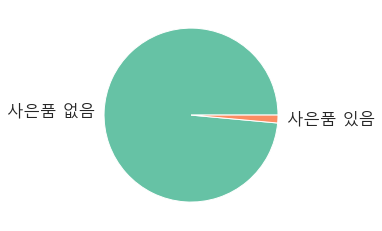

In [138]:
plt.pie(df_n['사은품여부'].value_counts(), labels=['사은품 없음','사은품 있음'])

In [139]:
df_n.groupby('사은품여부')[['실질판매수량']].sum()


,실질판매수량
사은품여부,
N,2246913
Y,7832


In [140]:
plus = df_n[df_n['상품코드'] == '사은품']
gift_n = plus[['상품명','상품명대분류','자재명','브랜드','사은품여부','구매월']] #사은품여부가 Y 인 데이터
gift = df_n[['상품명','상품명대분류','자재명','브랜드','사은품여부','구매월']] # 전체 데이터
gift_n[gift_n['상품명대분류']=='']['상품명'].value_counts()

[사은품]더비비고 영양꼬리곰탕500g    170
[사은품_허닭몰] 더비비고_황기닭백숙    110
[사은품] 복주머니 파우치(그린)       91
[사은품] 더비비고_수삼갈비탕         72
[사은품] 갓빠오즈               70
[사은품_더마켓] 더비비고 쇼핑백       30
에어프라이어용 종이호일(20매)        12
[사은품] 메티에 전용 펌프          10
[사은품]피자 커터기               6
[사은품_더마켓]생선구이 웰컴키트        3
Name: 상품명, dtype: int64

11번가

([<matplotlib.patches.Wedge at 0x2c81df916a0>,
 [Text(-1.0999824577957604, 0.006212289561693906, '사은품 없음'),
  Text(1.0999824581751854, -0.006212222378252653, '사은품 있음')])

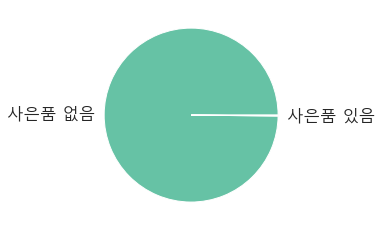

In [141]:
plt.pie(df_11['사은품여부'].value_counts(), labels=['사은품 없음','사은품 있음'])

In [142]:
df_11.groupby('사은품여부')[['실질판매수량']].sum()


,실질판매수량
사은품여부,
N,488312
Y,325


In [143]:
plus = df_11[df_11['상품코드'] == '사은품']
gift_n = plus[['상품명','상품명대분류','자재명','브랜드','사은품여부','구매월']] #사은품여부가 Y 인 데이터
gift = df_11[['상품명','상품명대분류','자재명','브랜드','사은품여부','구매월']] # 전체 데이터
gift_n[gift_n['상품명대분류']=='']['상품명'].value_counts()

스팸마라 340g    95
Name: 상품명, dtype: int64

> ## '자재'관련 컬럼

**< 자재코드 >** 의미  <br> 
    
* **코드 구분 기준**:   자재의 대분류명 같음 <br>
* **코드 10으로 시작(6자리)**:   사은품 없음 <br>
* **코드 992000로 시작(10자리)**:  해당 자재는 사은품.(기정사실) - 전부 사은품 있음. 에어프라이용 종이호일은 구체적 확인 필요<br>

* 사은품의 상품유형, 상품타입은 없음.

네이버

In [144]:
# 1.자재코드 길이 파악 => 6자리 10자리 코드로 구분됨.
set(len(str(i)) for i in  df_n['자재코드'])  # =>{6, 10}


# 2.'자재코드_길이' 컬럼 생성
if '자재코드_길이' not in df_n.columns:
    df_n.insert(df_n.columns.get_loc('자재코드')+1,'자재코드_길이', [len(str(i)) for i in  df_n['자재코드']])
print('자재코드가 6자린 경우 개수:', df_n['자재코드_길이'].value_counts()[6], ' /  자재코드가 10자린 경우 개수:',df_n['자재코드_길이'].value_counts()[10])

# 3. 자재코드 별 자재명 확인
df_n.groupby(['자재코드_길이','자재코드'])[['자재명']].sum();
# 99로 시작하고 10자리인 자재코드에 해당하는 애들은 모두 자재명 없음

자재코드가 6자린 경우 개수: 171573  /  자재코드가 10자린 경우 개수: 574


In [145]:
# 4. (위 경우 확인) 자재코드가 992000~ 으로 시작 => 전부 사은품 
df_n.groupby(['자재코드_길이','자재코드'])[['상품명','상품유형','상품타입','사은품여부']].sum().query('자재코드_길이 ==10');

In [146]:
# 5. '에어프라이어용 종이호일'이 사은품일까?
df_n[df_n['상품명'].str.contains('에어프라이어용') == True][['상품명','상품유형','상품타입','사은품여부']];
# => 상품유형이나 타입의 값이 없고, 사은품 여부에 모두 Y인 것으로 보아, 사은품이 맞음

11번가

In [147]:
# 1.자재코드 길이 파악 => 6자리 10자리 코드로 구분됨.
set(len(str(i)) for i in  df_11['자재코드']) # => {6, 10}


# 2.'자재코드_길이' 컬럼 생성
if '자재코드_길이' not in df_11.columns:
    df_11.insert(df_11.columns.get_loc('자재코드')+1,'자재코드_길이', [len(str(i)) for i in  df_11['자재코드']])
print('자재코드가 6자린 경우 개수:', df_11['자재코드_길이'].value_counts()[6], ' /  자재코드가 10자린 경우 개수:',df_11['자재코드_길이'].value_counts()[10])

# 3. 자재코드 별 자재명 확인
df_11.groupby(['자재코드_길이','자재코드'])[['자재명']].sum();
# 99로 시작하고 10자리인 자재코드에 해당하는 애들은 모두 자재명 없음

자재코드가 6자린 경우 개수: 172348  /  자재코드가 10자린 경우 개수: 95


In [148]:
# 4. (위 경우 확인) 자재코드가 992000~ 으로 시작 => 전부 사은품 
df_11.groupby(['자재코드_길이','자재코드'])[['상품명','상품유형','상품타입','사은품여부']].sum().query('자재코드_길이 ==10');

In [149]:
# 5. '스팸마라'가 사은품일까? 
df_11[df_11['상품명'].str.contains('스팸마라') == True][['상품명','상품유형','상품타입','사은품여부']];
# => 상품유형이나 타입의 값이 없고, 사은품 여부에 모두 Y인 것으로 보아, 사은품이 맞음

> ## 클레임_상태

주문/배송상태와는 다른 반품과 교환롼료 라는 항목이 들어있고, 그에 따른 분석 가능



네이버

In [150]:
df_n['클레임_상태'].value_counts(normalize=True).to_frame();

In [151]:
#주문취소상품과 동일한 퍼센트를 가지고 있음
df_n[df_n['클레임_상태'] =='취소완료']['상품명대분류'].value_counts(normalize = True).head();

In [152]:
# 반품처리중 상품 : 햇반,설탕,볶음밥,구이,고추장
df_n[df_n['클레임_상태'] =='반품처리중']['상품명대분류'].value_counts(normalize = True).head();

In [153]:
df_n.groupby(['평일/주말', '구매요일','클레임_상태','주문수량'])[['클레임_상태']].count();

11번가

In [154]:
df_11['클레임_상태'].value_counts(normalize=True).to_frame();

In [155]:
#주문취소상품과 동일한 퍼센트를 가지고 있음
df_11[df_11['클레임_상태'] =='취소완료']['상품명대분류'].value_counts(normalize = True).head();

In [156]:
# 반품처리중 상품 : 햇반,설탕,볶음밥,구이,고추장
df_11[df_11['클레임_상태'] =='반품처리중']['상품명대분류'].value_counts(normalize = True).head();

In [157]:
df_11.groupby(['평일/주말', '구매요일','클레임_상태','주문수량'])[['클레임_상태']].count();

> ## 거래처

네이버

In [158]:
# 거래처 컬럼 분석, '외부물_직거래_네이버(신) 단일값밖에 없음
df_n['거래처'].value_counts()

외부몰_직거래_네이버(신)    172147
Name: 거래처, dtype: int64

11번가

In [159]:
# 거래처 컬럼 분석, '외부물_직거래_네이버(신) 단일값밖에 없음
df_11['거래처'].value_counts()

외부몰_직거래_11번가(신)    172443
Name: 거래처, dtype: int64

> ## 주문일


네이버

In [160]:
# 가장 주문 많은 일 (top5): 6월 10일, 5월 17일, 6월 17일, 5월 18일, 6월 30일
df_n['주문일'].value_counts(normalize = True).head(5)

2022-06-10    0.149343
2022-05-17    0.116540
2022-06-17    0.057741
2022-05-18    0.052978
2022-06-30    0.028685
Name: 주문일, dtype: float64

In [161]:
# 가장 주문 많은 날(top1) 판매 품목 : 햇반,만두,왕교자,볶음밥,햇반흑미밥
df_n[df_n['주문일'] =='2022-06-10']['상품명대분류'].value_counts(normalize = True).head(15);

In [162]:
# 가장 주문 많은 날(top2) 판매 품목 : 햇반,만두,왕교자,주먹밥,햇반흑미밥
df_n[df_n['주문일'] =='2022-05-17']['상품명대분류'].value_counts(normalize = True).head(15) ;

날짜와 상관없이 '햇반, 만두, 왕교자' 상품은 주문일과 관계없이 판매상품들중에서 항상 우위를 점하는 것으로 보임.

=> 그렇다면 그러한 상품들을 빼고 다시 상품들을 확인을 해야하는 건지?

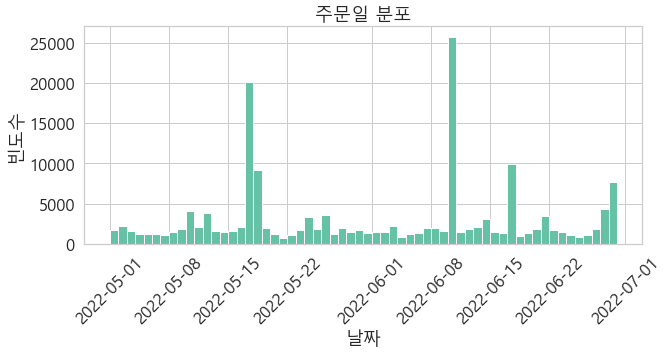

In [163]:
#주문일, "5월 17일"과 "6월 10일"에 주문일이 몰려있는 경향 발견

df_n['주문일'] = pd.to_datetime(df_n['주문일'])
date_counts = df_n['주문일'].value_counts().sort_index()
plt.figure(figsize=(10, 4))
plt.hist(df_n['주문일'], bins='auto')
plt.title('주문일 분포')
plt.xlabel('날짜')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.show()


11번가

cf) 4월이 5월, 5월이 6월

In [164]:
# 가장 주문 많은 일 (top5): 5월 11일, 5월 11일, 6월 25일, 6월 7일, 5월 27일
df_11['주문일'].value_counts(normalize = True).head(5)

2022-04-11    0.254107
2022-05-11    0.184154
2022-05-25    0.073891
2022-05-07    0.072059
2022-04-27    0.039097
Name: 주문일, dtype: float64

In [165]:
# 가장 주문 많은 날(top1) 판매 품목 : 왕교자, 양념, 만두, 주먹밥, 탕수육,,,
df_11[df_11['주문일'] =='2022-04-11']['상품명대분류'].value_counts(normalize = True).head(15)

교자      0.305187
양념      0.165773
만두      0.113900
햇반      0.090144
탕수육     0.031128
핫도그     0.019101
짬뽕      0.016157
볶음밥     0.015062
사골곰탕    0.014469
구이      0.014081
떡갈비     0.013213
스테이크    0.012552
돈카츠     0.012529
죽       0.011799
깐풍기     0.010931
Name: 상품명대분류, dtype: float64

In [166]:
# 가장 주문 많은 날(top2) 판매 품목 : 왕교자, 양념, 주먹밥, 만두, 구이,,,
df_11[df_11['주문일'] =='2022-05-11']['상품명대분류'].value_counts(normalize = True).head(15)

교자      0.284545
양념      0.206071
햇반      0.126149
만두      0.092014
구이      0.020469
떡갈비     0.016532
사골곰탕    0.015336
스테이크    0.015273
탕수육     0.015052
돈카츠     0.013572
죽       0.012250
핫도그     0.011053
볶음밥     0.009825
소고기     0.009699
육개장     0.008408
Name: 상품명대분류, dtype: float64

날짜와 상관없이 '왕교자, 양념, 만두, 주먹밥' 상품은 주문일과 관계없이 판매상품들중에서 항상 우위를 점하는 것으로 보임.

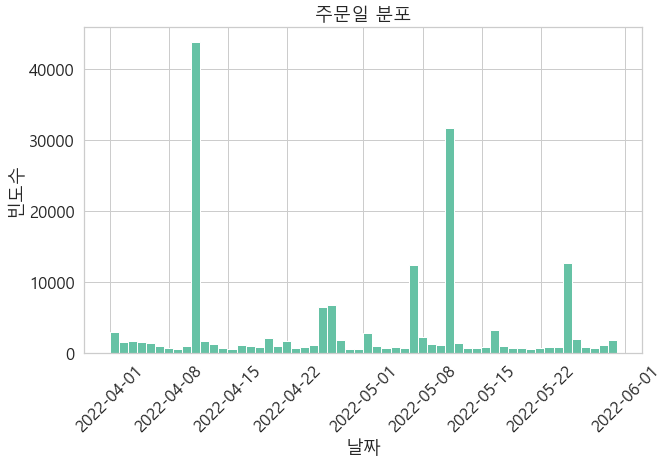

In [167]:

#주문일, "5월 17일"과 "6월 10일"에 주문일이 몰려있는 경향 발견

df_11['주문일'] = pd.to_datetime(df_11['주문일'])
date_counts = df_11['주문일'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.hist(df_11['주문일'], bins='auto')
plt.title('주문일 분포')
plt.xlabel('날짜')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.show()


> ## 출고예정일


네이버

In [168]:
df_n['출고예정일'] = pd.to_datetime(df_n['출고예정일'], format = '%Y%m%d')

# 출고예정일은 6월 11일, 5월 19일, 6월 19일, 5월 18일 순으로 점유율이 높음 #6월 10일과 5월 17일 
# 출고예정일이 높게 나온 일들은 모두 주문일이 가장 높은 일수와 1~2일 차이가 나고 있음.
df_n['출고예정일'].value_counts(normalize = True).head()

2022-06-11    0.098387
2022-05-19    0.067559
2022-06-19    0.053780
2022-05-18    0.050689
2022-06-12    0.044404
Name: 출고예정일, dtype: float64

In [169]:
df_n[df_n['출고예정일']=='2022-08-03']['자재명']

2779    B)강력1등 20kg
2780    B)강력1등 20kg
Name: 자재명, dtype: object

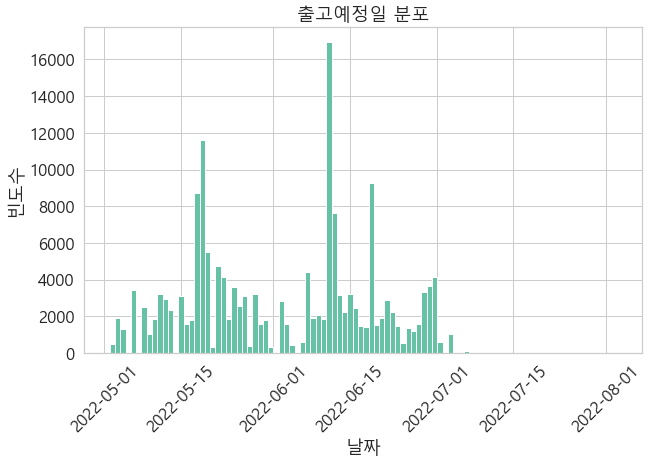

In [170]:
#시각화

df_n['출고예정일'] = pd.to_datetime(df_n['출고예정일'])
date_counts = df_n['출고예정일'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.hist(df_n['출고예정일'], bins='auto')
plt.title('출고예정일 분포')
plt.xlabel('날짜')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.show()

11번가

In [171]:
df_11['출고예정일'] = pd.to_datetime(df_11['출고예정일'], format = '%Y%m%d')

# 출고예정일은 6월 11일, 5월 19일, 6월 19일, 5월 18일 순으로 점유율이 높음 #6월 10일과 5월 17일 
# 출고예정일이 높게 나온 일들은 모두 주문일이 가장 높은 일수와 1~2일 차이가 나고 있음.
df_11['출고예정일'].value_counts(normalize = True).head()

2022-04-13    0.157971
2022-05-13    0.136770
2022-04-12    0.075080
2022-04-28    0.064456
2022-05-27    0.052870
Name: 출고예정일, dtype: float64

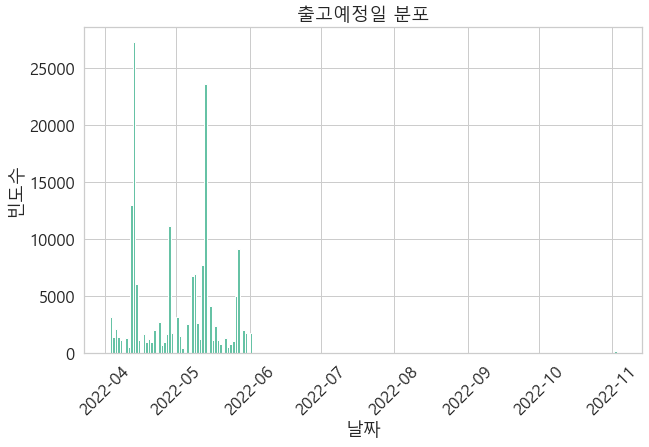

In [172]:
#시각화

df_11['출고예정일'] = pd.to_datetime(df_11['출고예정일'])
date_counts = df_11['출고예정일'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.hist(df_11['출고예정일'], bins='auto')
plt.title('출고예정일 분포')
plt.xlabel('날짜')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.show()

> ## 주문/배송상태


네이버

In [173]:
#주문/배송상태
df_n['주문/배송상태'].value_counts(normalize= True)

배송 완료    0.971559
주문취소     0.027889
배송 취소    0.000314
배송 중     0.000209
주문완료     0.000017
배송 준비    0.000006
출고 지시    0.000006
Name: 주문/배송상태, dtype: float64

In [174]:
# 주문취소상품 : 햇반,콩기름,만두,설탕,주먹밥
df_n[df_n['주문/배송상태'] =='주문취소']['상품명대분류'].value_counts(normalize = True).head()

햇반     0.391377
콩기름    0.051448
만두     0.046657
설탕     0.040825
주먹밥    0.033326
Name: 상품명대분류, dtype: float64

In [175]:
# 배송취소상품 : 햇반,구이,설탕,스팸,고추장 
df_n[df_n['주문/배송상태'] =='배송 취소']['상품명대분류'].value_counts(normalize = True).head()

햇반     0.240741
구이     0.129630
설탕     0.111111
스팸     0.092593
고추장    0.074074
Name: 상품명대분류, dtype: float64

11번가

In [176]:
#주문/배송상태
df_11['주문/배송상태'].value_counts(normalize= True)

배송 완료    0.977796
주문취소     0.021943
배송 취소    0.000110
배송 중     0.000093
배송 준비    0.000058
Name: 주문/배송상태, dtype: float64

In [177]:
# 주문취소상품 : 양념, 왕교자, 주먹밥, 만두
df_11[df_11['주문/배송상태'] =='주문취소']['상품명대분류'].value_counts(normalize = True)

양념     0.255814
교자     0.142178
햇반     0.117600
만두     0.063425
죽      0.038848
         ...   
요리유    0.000264
소바     0.000264
육수     0.000264
쌈무     0.000264
기름     0.000264
Name: 상품명대분류, Length: 105, dtype: float64

In [178]:
# 배송취소상품 : 핫도그, 냉면, 햇반, 만두 , 양념 
df_11[df_11['주문/배송상태'] =='배송 취소']['상품명대분류'].value_counts(normalize = True).head()

핫도그    0.315789
냉면     0.157895
햇반     0.157895
만두     0.157895
양념     0.105263
Name: 상품명대분류, dtype: float64

### 11번가 데이터 정리

가설 설정 및 검정

> # 가설1.
> ### **용량이 적은 상품들의 판매량이 더 높을 것이다.**


In [179]:
df_n[df_n['상품명대분류'].str.contains('만두', na = False)]['용량'].value_counts(normalize=True)

400       0.616424
509       0.197654
          0.051262
370       0.029244
618       0.028564
384       0.019468
450       0.017683
420       0.010627
1000.0    0.008671
392       0.007056
168       0.004081
200       0.001105
1200.0    0.001105
500       0.001105
980       0.001020
600       0.001020
700       0.000935
300       0.000850
490       0.000765
1050.0    0.000595
2000.0    0.000510
1500.0    0.000255
Name: 용량, dtype: float64

In [180]:
df_n[df_n['자재명'].str.contains('고메', na = False)]['용량'].value_counts(normalize=True)

450    0.274499
652    0.112007
840    0.080046
152    0.066321
760    0.058259
400    0.050389
425    0.041943
147    0.038775
480    0.035992
520    0.032825
540    0.025722
550    0.025338
135    0.025242
140    0.024666
145    0.021403
405    0.019100
       0.009406
900    0.007486
330    0.007006
320    0.007006
465    0.006143
360    0.005759
310    0.003743
370    0.003359
189    0.002783
325    0.002783
250    0.002783
445    0.002495
270    0.001920
380    0.001344
430    0.000960
720    0.000864
300    0.000768
640    0.000576
326    0.000288
Name: 용량, dtype: float64

In [181]:
df_n[df_n['자재명'].str.contains('비비고', na = False)]['용량'].value_counts(normalize=True)

400       0.203747
500       0.177371
1050.0    0.107787
420       0.088807
60        0.062099
            ...   
210       0.000111
40        0.000089
140       0.000089
20        0.000044
2.5       0.000044
Name: 용량, Length: 67, dtype: float64

In [182]:
df_n[df_n['자재명'].str.contains('카놀라유', na = False)]['용량'].value_counts(normalize=True)

500    0.619048
900    0.380952
Name: 용량, dtype: float64

> # 가설2.
> ### **과거에 비해 가공식품 및 가정 간편식 시장의 규모가 증가하였을 것이다.**

![이미지](https://wimg.mk.co.kr/meet/neds/2022/03/image_readmed_2022_200581_16462937954963641.jpg)

> # 가설3.
> ### **기념일이 많은 5월에 외식이나 배달로 인해 즉석 식품의 소비가 줄 것이다.**

Text(0.5, 1.0, '고메 용량별 판매수 TOP 5')

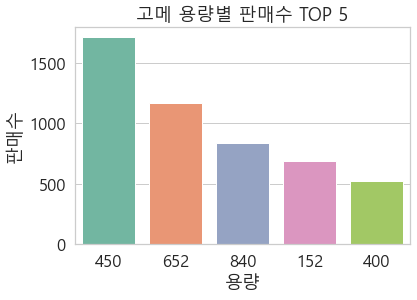

In [183]:
sns.barplot(x='용량', y='판매수', data=df_n[df_n['브랜드'] == '고메'].groupby(['용량'])[['자재명']].count().reset_index().sort_values(by='자재명', ascending=False).iloc[:5].rename(columns={'자재명': '판매수'}))
plt.title('고메 용량별 판매수 TOP 5')

Text(0.5, 1.0, '비비고 용량별 판매수 TOP 5')

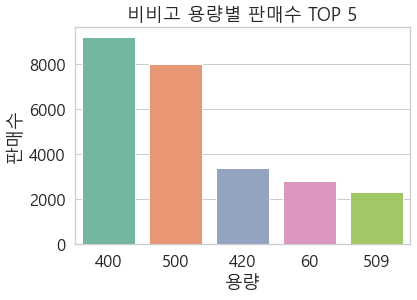

In [184]:
sns.barplot(x='용량', y='판매수', data=df_n[df_n['브랜드'] == '비비고'].groupby(['용량'])[['자재명']].count().reset_index().sort_values(by='자재명', ascending=False).iloc[:5].rename(columns={'자재명': '판매수'}))
plt.title('비비고 용량별 판매수 TOP 5')

Text(0.5, 1.0, '스파게티면 용량별 판매수')

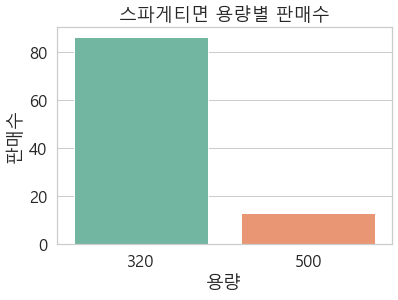

In [185]:
sns.barplot(x='용량', y='판매수', data=df_n[df_n['자재명'].str.contains('백설/스파게티면',na = False)].groupby(['용량'])[['자재명']].count().reset_index().sort_values(by='자재명', ascending=False).iloc[:5].rename(columns={'자재명': '판매수'}))
plt.title('스파게티면 용량별 판매수')

> ## 기념일 - 마케팅 기획안 코드 파일에 첨부

>    * 5월 기념일:
    근로자의 날, 어린이 날, 어버이 날, 동학농민혁명기념일, 스승의 날, 5.18 민주화운동 기념일, 부부의 날, 성년의 날, 바다의 날
>
>  * 6월 기념일:
    의병의 날, 환경의 날, 현충일, 6.10 민주항쟁 기념일, 6.10만세 운동 기념일,6.25전쟁일, 철도의 날

>    **<마케팅 타켓으로 할 기념일>** <br>
        5월: 어린이 날, 어버이 날 ~~스승의 날, (부부의 날), 성년의 날 <br>
        6월: -~~

In [186]:
# 타켓으로 할 기념일 선정
기념일 = {'어린이날': '20220505',
          '어버이날': '20220508'}

In [187]:
# 기념일 주간 추출 (기념일로부터 일주일 전~기념일 당일까지)
기념일주간 = {}
for key, value in 기념일.items():
    기념일주간[key] = []
    기념일_날짜 = datetime.strptime(value, '%Y%m%d')
    주간_시작 = 기념일_날짜 - timedelta(weeks=1)


In [188]:
    # 주간 범위 내 모든 날짜 추가 (5월 이상만)
    while 주간_시작 <= 기념일_날짜:
        if 주간_시작.month == 5:
            기념일주간[key].append(주간_시작.strftime('%Y-%m-%d'))
        주간_시작 += timedelta(days=1)

print(기념일주간)

{'어린이날': [], '어버이날': ['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08']}


네이버

In [189]:
# 기념일 주간에 해당하는 날만 추출한 데이터프레임 생성
기념일df_n = df_n[df_n['주문일'].isin([date for lst in 기념일주간.values() for date in lst])]

11번가

In [190]:
# 기념일 주간에 해당하는 날만 추출한 데이터프레임 생성
기념일df_11 = df_11[df_11['주문일'].isin([date for lst in 기념일주간.values() for date in lst])]

* 기념일 주간 내 판매수량

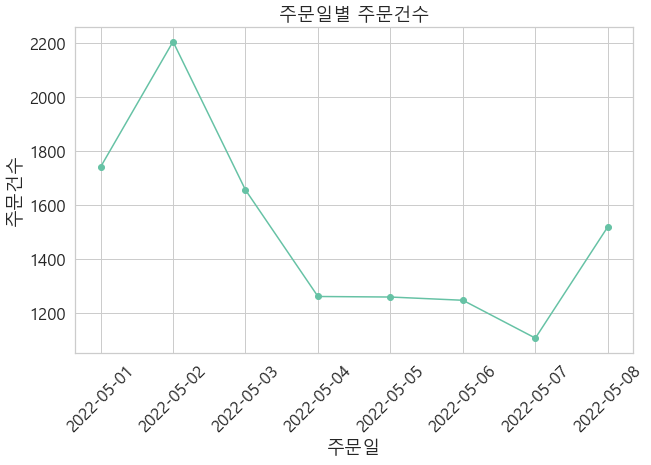

In [191]:
기념일df_n_count = 기념일df_n.groupby('주문일')[['주문일']].count()

#시각화
plt.figure(figsize=(10, 6))
plt.plot(기념일df_n_count.index, 기념일df_n_count['주문일'], marker='o')
plt.title('주문일별 주문건수')
plt.xlabel('주문일')
plt.ylabel('주문건수')
plt.xticks(rotation=45)
plt.show()

* <주류> 상위 10개 브랜드의 기념일 주간 내 판매수량 - 전체 기간에서

In [192]:
nav_top10 = df_n['브랜드'].value_counts().head(10).index ; nav_top10

Index(['햇반', '비비고', '백설', '씨제이', '고메', '스팸', '해찬들', '더건강한', '다담', '쁘띠첼'], dtype='object')

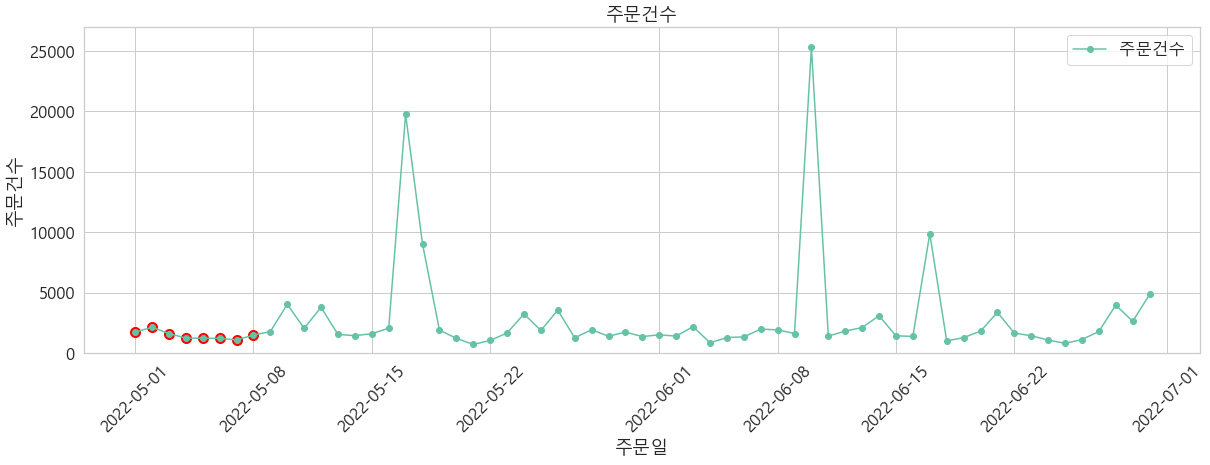

In [193]:
nav_top10_df = df_n[df_n['브랜드'].isin(nav_top10)]
nav_브랜드top_df = nav_top10_df.groupby('주문일')[['주문일']].count()

#시각화

plt.figure(figsize=(20, 6))
plt.plot(nav_브랜드top_df.index, nav_브랜드top_df['주문일'], marker='o', label='주문건수')
plt.title('주문건수')
plt.xlabel('주문일')
plt.ylabel('주문건수')
plt.xticks(rotation=45)
plt.ylim(0, 27000)  # 원하는 범위로 설정
plt.legend()

# 특정 기간 설정
value_list = [value for sublist in 기념일주간.values() for value in sublist]
start_date = min(value_list)
end_date = max(value_list)
# 특정 기간의 데이터 포인트 강조
highlighted_data = nav_브랜드top_df[(nav_브랜드top_df.index >= start_date) & (nav_브랜드top_df.index <= end_date)]
plt.scatter(highlighted_data.index, highlighted_data['주문일'], color='red', s=100, label='Highlighted Period')

plt.show()

* <비주류> 하위 10개 브랜드의 기념일 주간 내 판매수량  - 전체 기간에서

In [194]:
nav_bottom10 = df_n['브랜드'].value_counts().tail(10).index ; nav_bottom10

Index(['맥스봉', '맛밤', '쿡킷', '즐거운동행', '메티에', '하선정', '행복한콩', '산들애', '삼호',
       '즐거운 동행'],
      dtype='object')

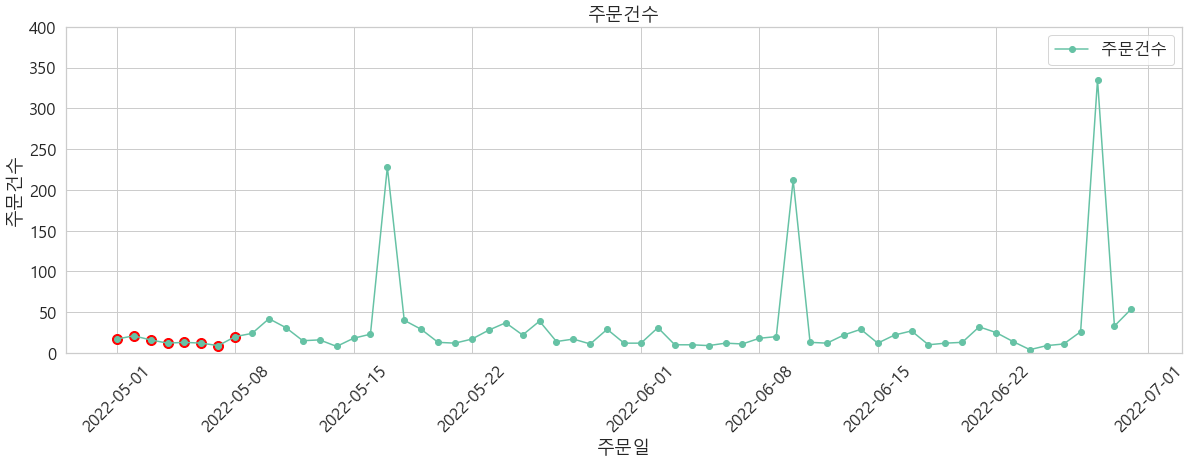

In [195]:
nav_bottom10_df = df_n[df_n['브랜드'].isin(nav_bottom10)]
nav_브랜드bottom_df = nav_bottom10_df.groupby('주문일')[['주문일']].count()

#시각화

plt.figure(figsize=(20, 6))
plt.plot(nav_브랜드bottom_df.index, nav_브랜드bottom_df['주문일'], marker='o', label='주문건수')
plt.title('주문건수')
plt.xlabel('주문일')
plt.ylabel('주문건수')
plt.xticks(rotation=45)
plt.ylim(0, 400)  # top10항목들과의 비교를 위해 동일한 범위로 설정
plt.legend()

# 특정 기간 설정
value_list = [value for sublist in 기념일주간.values() for value in sublist]
start_date = min(value_list)
end_date = max(value_list)
# 특정 기간의 데이터 포인트 강조
highlighted_data = nav_브랜드bottom_df[(nav_브랜드bottom_df.index >= start_date) & (nav_브랜드bottom_df.index <= end_date)]
plt.scatter(highlighted_data.index, highlighted_data['주문일'], color='red', s=100, label='Highlighted Period')

plt.show()

11번가

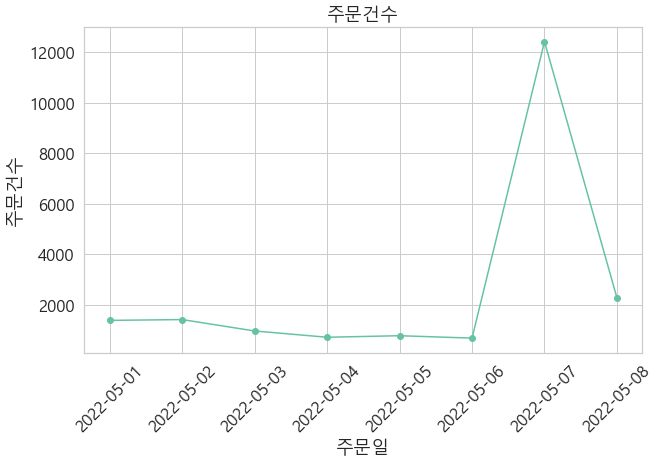

In [196]:
기념일df_11_count = 기념일df_11.groupby('주문일')[['주문일']].count()

#시각화
plt.figure(figsize=(10, 6))
plt.plot(기념일df_11_count.index, 기념일df_11_count['주문일'], marker='o')
plt.title('주문건수')
plt.xlabel('주문일')
plt.ylabel('주문건수')
plt.xticks(rotation=45)
plt.show()

* <주류> 상위 10개 브랜드의 기념일 주간 내 판매수량 - 전체 기간에서

In [197]:
ele_top10 = df_11['브랜드'].value_counts().head(10).index ; ele_top10

Index(['비비고', '다담', '씨제이', '햇반', '고메', '백설', '스팸', '쁘띠첼', '더건강한', '해찬들'], dtype='object')

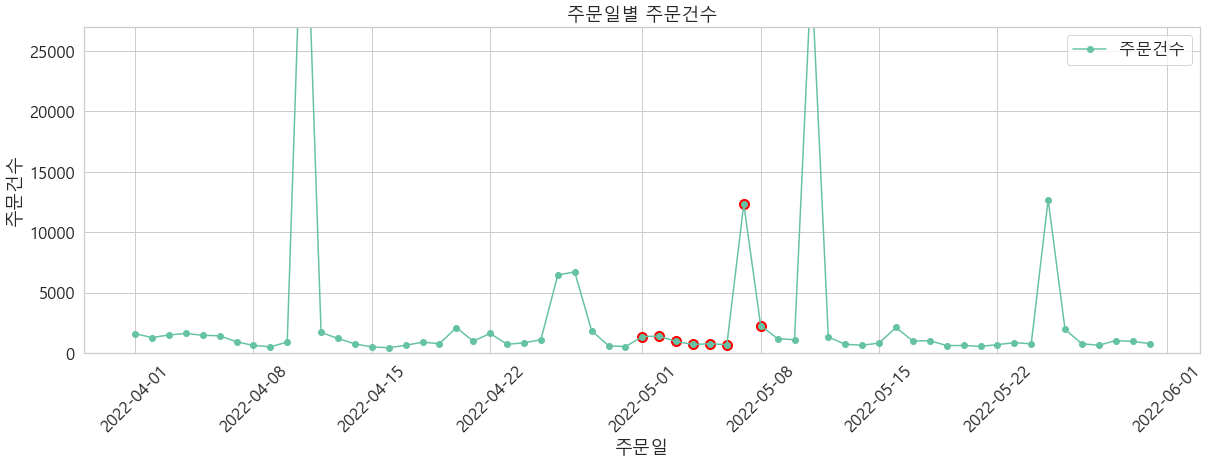

In [198]:
ele_top10_df = df_11[df_11['브랜드'].isin(ele_top10)]
ele_브랜드top_df = ele_top10_df.groupby('주문일')[['주문일']].count()

#시각화

plt.figure(figsize=(20, 6))
plt.plot(ele_브랜드top_df.index, ele_브랜드top_df['주문일'], marker='o', label='주문건수')
plt.title('주문일별 주문건수')
plt.xlabel('주문일')
plt.ylabel('주문건수')
plt.xticks(rotation=45)
plt.ylim(0, 27000)  # 원하는 범위로 설정  
plt.legend()

# 특정 기간 설정
value_list = [value for sublist in 기념일주간.values() for value in sublist]
start_date = min(value_list)
end_date = max(value_list)
# 특정 기간의 데이터 포인트 강조
highlighted_data = ele_브랜드top_df[(ele_브랜드top_df.index >= start_date) & (ele_브랜드top_df.index <= end_date)]
plt.scatter(highlighted_data.index, highlighted_data['주문일'], color='red', s=100, label='Highlighted Period')

plt.show()

* <비주류> 하위 10개 브랜드의 기념일 주간 내 판매수량

In [199]:
ele_bottom10 = df_11['브랜드'].value_counts().tail(10).index ; ele_bottom10

Index(['다시다', '하선정', '사은품', '맥스봉', '즐거운동행', '삼호', '산들애', '행복한콩', '크레잇',
       '즐거운 동행'],
      dtype='object')

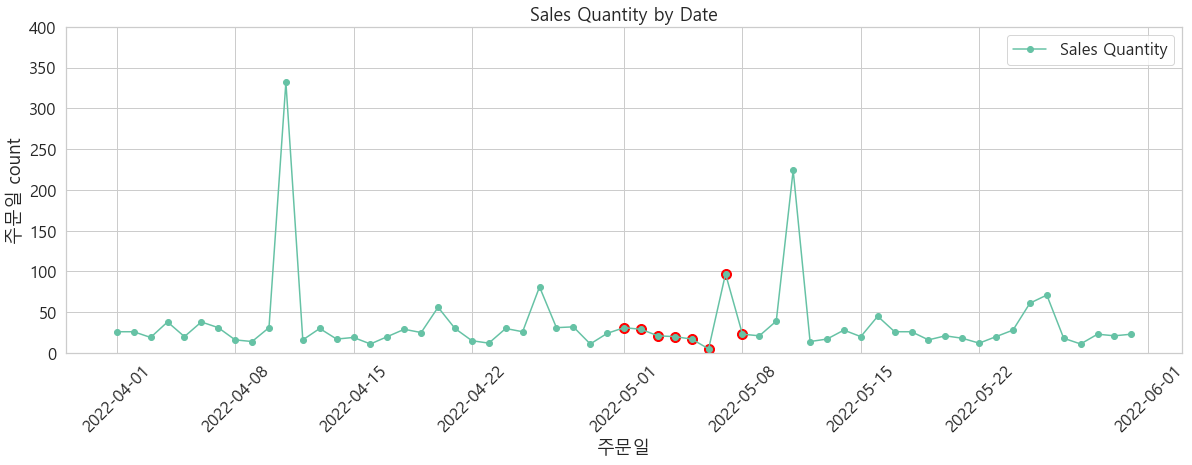

In [200]:
ele_bottom10_df = df_11[df_11['브랜드'].isin(ele_bottom10)]
ele_브랜드bottom_df = ele_bottom10_df.groupby('주문일')[['주문일']].count()

#시각화

plt.figure(figsize=(20, 6))
plt.plot(ele_브랜드bottom_df.index, ele_브랜드bottom_df['주문일'], marker='o', label='Sales Quantity')
plt.title('Sales Quantity by Date')
plt.xlabel('주문일')
plt.ylabel('주문일 count')
plt.xticks(rotation=45)
plt.ylim(0, 400)  # top10항목들과의 비교를 위해 동일한 범위로 설정
plt.legend()

# 특정 기간 설정
value_list = [value for sublist in 기념일주간.values() for value in sublist]
start_date = min(value_list)
end_date = max(value_list)
# 특정 기간의 데이터 포인트 강조
highlighted_data = ele_브랜드bottom_df[(ele_브랜드bottom_df.index >= start_date) & (ele_브랜드bottom_df.index <= end_date)]
plt.scatter(highlighted_data.index, highlighted_data['주문일'], color='red', s=100, label='Highlighted Period')

plt.show()

> # 가설4.
> ### **다이어트 관련된 상품들의 월별 총 매출이 5월보다 6월에 더 높을 것이다.**

In [201]:
#1. 다이어트 상품 설정
diet_kw=['닭가슴살','곤약','두부','드레싱','잡곡','현미','고구마','야채']
diet_kw1='|'.join(diet_kw)
diet_kw

['닭가슴살', '곤약', '두부', '드레싱', '잡곡', '현미', '고구마', '야채']

### 네이버

In [202]:
# 2-1. 네이버 상품명 데이터에서 다이어트 상품만 추출
diet_f11=df_11[df_11['상품명'].str.contains(diet_kw1)]
dn = diet_f11.groupby('구매월')[['매출액']].sum().reset_index()# 네이버 다이어트 상품 매출액 총합
df_11.groupby(['구매월'])[['매출액']].sum() # 네이버 전체 상품 매출액 총합

,매출액
구매월,
4,698908448
5,762003460


In [203]:
# 월별 다이어트 식품 매출액 비율
print ('5월 다이어트 식품 매출액 비율:', 265644272/1687270174*100)
print ('6월 다이어트 식품 매출액 비율:', 316735732/1667826736*100)

5월 다이어트 식품 매출액 비율: 15.744027014371914
6월 다이어트 식품 매출액 비율: 18.990925445867177


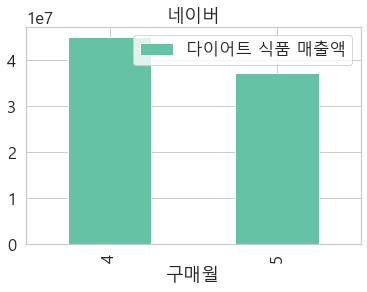

In [204]:
dn.plot.bar(x='구매월', y='매출액', label='다이어트 식품 매출액')
plt.title('네이버');

In [205]:
b=df_n.groupby(['자재명'])[['주문수량']].sum().sort_values(by='주문수량', ascending=False).reset_index()
b[:20]

,자재명,주문수량
0,햇반흑미밥210g,200088
1,햇반작은공기130G/상온,159624
2,햇반/매일찰잡곡밥 210G/상온,140064
3,햇반 현미쌀밥 210G/상온,137928
4,햇반/매일잡곡밥210G/상온,124872
5,햇반210G(36입)NEW/상온,70201
6,비비고/사골곰탕 500G_18입/상온,60574
7,햇반발아현미밥210G/상온,54600
8,햇반 매일콩잡곡밥 210G/상온,51888
9,햇반큰공기300G/상온,47250


### 밥
- 흑미밥210g (310kcal)
- 찰잡곡밥210g (320)
- 현미밥210g (305)
- 콩잡곡밥210g (310)
- 기본 210g (315)
- 유기농쌀밥210g (310)
---------------------------
- 작은 현미밥 130g (195)
- 작은 흑미밥 130g (190)
- 작은 기본 130g (190)

-> 작은 기본 (가성비/더저렴), 작은 흑미밥(영양풍부)
-> 아침에는 작은 기본 or 작은 흑미 / 저녁에는 곤약밥

### 죽
- 죽 중에 가장 구매율이 높은 전복죽 420g (230)
- 소고기죽 (235)

### 국
- 1위 미역국 (95)
- 소고기무국 (60)

### 닭가슴살 키워드
- 더건강한이 장악함
- 1위 (195)
- 2위 (130) 다이어트라기엔 열량이 높음

### 11번가
cf) 4월이 5월, 5월이 6월

In [206]:
# 2-1. 11번가 상품명 데이터에서 다이어트 상품만 추출
diet_f11=df_11[df_11['상품명'].str.contains(diet_kw1)]
d11 = diet_f11.groupby('구매월')[['매출액']].sum().reset_index() # 11번가 다이어트 상품 매출액 총합
df_11.groupby(['구매월'])[['매출액']].sum() # 11번가 전체 상품 매출액 총합

,매출액
구매월,
4,698908448
5,762003460


In [207]:
# 월별 다이어트 식품 매출액 비율
print ('5월 다이어트 식품 매출액 비율:', 45030835/698908448*100)
print ('6월 다이어트 식품 매출액 비율:', 37293633/762003460*100)

5월 다이어트 식품 매출액 비율: 6.443023421574094
6월 다이어트 식품 매출액 비율: 4.894155336250048


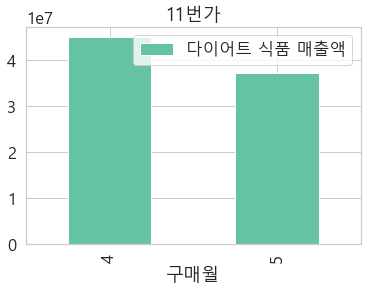

In [208]:
d11.plot.bar(x='구매월', y='매출액', label='다이어트 식품 매출액')
plt.title('11번가');

In [209]:
c=df_11.groupby(['자재명'])[['주문수량']].sum().sort_values(by='주문수량', ascending=False).reset_index()
c[:50]

,자재명,주문수량
0,다담/정통된장찌개양념 140G/24입/냉장,45492
1,다담/순두부찌개양념 140G/24입/냉장,36666
2,비비고/사골곰탕 500G_18입/상온,28023
3,CJ비비고왕교자455G*2EA/냉동,20027
4,다담/우렁강된장비빔양념 140G/24입/냉장,12720
5,A)햇반/쿡반 김치치즈주먹밥 500G/냉동,9519
6,CJ비비고왕교자1.05KG/냉동,8039
7,다담/부대찌개양념 140G/24입/냉장,7746
8,CJ비비고김치왕교자420G*2EA/냉동,7449
9,고메함박스테이크152G(22입)/냉장,7240


> # 가설5.
> ### **사은품이 있는 상품의 주문량이 더 높을 것이다.**

 **<p style= "font-size:20px">   1) 꼬리곰탕 - '더비비고'와 '비비고'의 차이** </p>
      결과 5월에서 6월로 갈 때 더비비고 영양꼬리곰탕의 판매율이 100% 넘게 상승한 것으로 보아 해당상품의 경우  사은품을 통한 프로모션의 효과가 큰 것으로 추측함

In [210]:

plus = df_n[df_n['상품코드'] == '사은품']
gift_n = plus[['상품명','상품명대분류','자재명','브랜드','사은품여부','구매월']] #사은품여부가 Y 인 데이터
gift = df_n[['상품명','상품명대분류','자재명','브랜드','사은품여부','구매월']] # 전체 데이터

In [211]:
gift_5 = gift[gift['구매월'] == 5]
gift_5[gift_5['자재명'] =='더비비고 영양꼬리곰탕 500G/상온']['사은품여부'].value_counts()

Y    57
N    10
Name: 사은품여부, dtype: int64

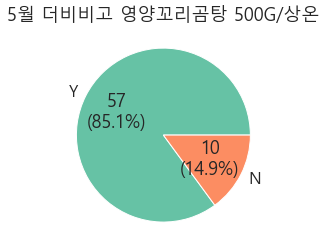

In [212]:
# 데이터 설정
labels = ['Y', 'N']
values = [57, 10]

# 파이 차트 그리기
def label_format(val):
    return f"{int(round(val/100*sum(values)))}\n({val:.1f}%)"

plt.pie(values, labels=labels, autopct=label_format)
plt.title("5월 더비비고 영양꼬리곰탕 500G/상온")

plt.show()

In [213]:
# gift[gift[gift['구매월'] == '6']['자재명'] =='더비비고 영양꼬리곰탕 500G/상온']['사은품여부'].value_counts()


gift_6 = gift[gift['구매월'] == 6]
gift_6[gift_6['자재명'] =='더비비고 영양꼬리곰탕 500G/상온']['사은품여부'].value_counts()

Y    120
N      6
Name: 사은품여부, dtype: int64

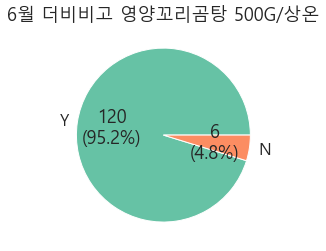

In [214]:
# 데이터 설정
labels = ['Y', 'N']
values = [120, 6]

# 파이 차트 그리기
def label_format(val):
    return f"{int(round(val/100*sum(values)))}\n({val:.1f}%)"

plt.pie(values, labels=labels, autopct=label_format)
plt.title("6월 더비비고 영양꼬리곰탕 500G/상온")

plt.show()

 **<p style= "font-size:20px">   2) 갈비탕** </p>
      두 상품의 가격비교 또한 진행했으나, 수삼갈비탕보다 그냥 갈비탕의 가격의 더 높은 것으로 판단되었고, 그 결과 그냥 갈비탕의 품질자체가 수삼갈비탕보다 더 좋은 것으로 판단되어 구매를 더 많이 하는 것으로 생각됨

In [215]:
gift_n[gift_n['상품명대분류']=='갈비탕']['자재명'].value_counts()

Series([], Name: 자재명, dtype: int64)

In [222]:
df_n[df_n['자재명'] == '더비비고_수삼갈비탕500G/상온'][['주문수량','매출액']]
#개당 8000원

df_n[df_n['자재명'] == '비비고/갈비탕 400G_18입/상온'][['주문수량','매출액']]
#개당 4000원

,주문수량,매출액
286,0,0
435,6,23330
526,6,25450
558,6,24570
563,6,23330
...,...,...
34540,6,26920
34716,6,26450
35450,6,28900
35764,6,26450


In [217]:
gift[gift['자재명'] =='더비비고_수삼갈비탕500G/상온']['사은품여부'].value_counts()

Y    76
N    11
Name: 사은품여부, dtype: int64

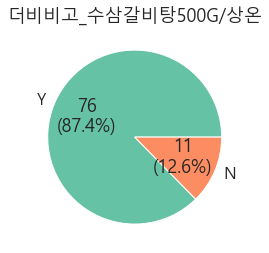

In [218]:
# 데이터 설정
labels = ['Y', 'N']
values = [76, 11]

# 파이 차트 그리기
def label_format(val):
    return f"{int(round(val/100*sum(values)))}\n({val:.1f}%)"

plt.pie(values, labels=labels, autopct=label_format)
plt.title("더비비고_수삼갈비탕500G/상온")

plt.show()

In [219]:
gift[gift['자재명'] =='비비고/갈비탕 400G_18입/상온']['사은품여부'].value_counts()

N    562
Y     20
Name: 사은품여부, dtype: int64

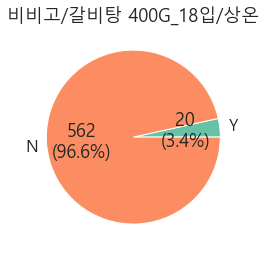

In [220]:
# 데이터 설정
labels = ['Y', 'N']
values = [20, 562]

# 파이 차트 그리기
def label_format(val):
    return f"{int(round(val/100*sum(values)))}\n({val:.1f}%)"

plt.pie(values, labels=labels, autopct=label_format)
plt.title("비비고/갈비탕 400G_18입/상온")

plt.show()